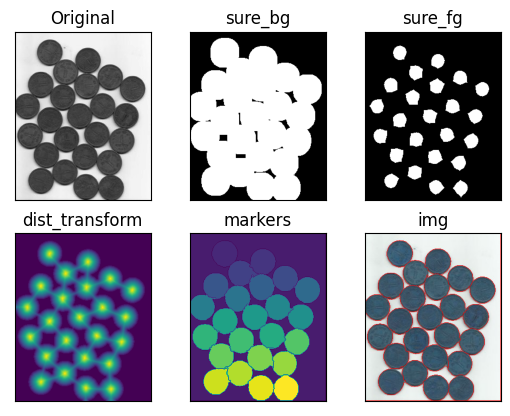

In [48]:
import numpy as np 
import cv2 
from matplotlib import pyplot as plt

# 读入图像
img = cv2.imread('assets/water_coins.jpg')
gray = cv2.imread('assets/water_coins.jpg', 0)

# 阈值化
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU )

# 开运算（先腐蚀后膨胀），去噪声
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

# 背景区域
sure_bg = cv2.dilate(opening, kernel, iterations = 3)

# 通过距离变换，然后阈值化找前景
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
# 这个地方的阈值（0.5 * dist_transform.max()）调节很重要，直接关系到后面的分割效果
ret, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, cv2.THRESH_BINARY)

# 计算未知区域
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# 标记连通区域
ret, markers = cv2.connectedComponents(sure_fg)

# 所有的标记+1，背景改为1，而不是0
markers = markers + 1

# # 标记不确定区域为0
markers[unknown==255] = 0

# 用分水岭方法找到标记，如果标记为 -1，则该位置设置蓝色，即边缘颜色
markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]

# 显示分割的图像
image2 = np.uint8(img)
cv2.imshow("img2", image2)

# 显示各阶段的图像
plt.subplot(231), plt.imshow(gray, 'gray'), plt.title(
    'Original'), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(sure_bg, 'gray'), plt.title(
    'sure_bg'), plt.xticks([]), plt.yticks([])
plt.subplot(233), plt.imshow(sure_fg, 'gray'), plt.title(
    'sure_fg'), plt.xticks([]), plt.yticks([])
plt.subplot(234), plt.imshow(dist_transform), plt.title(
    'dist_transform'), plt.xticks([]), plt.yticks([])
plt.subplot(235), plt.imshow(markers), plt.title(
    'markers'), plt.xticks([]), plt.yticks([])
plt.subplot(236), plt.imshow(img), plt.title(
    'img'), plt.xticks([]), plt.yticks([])
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()


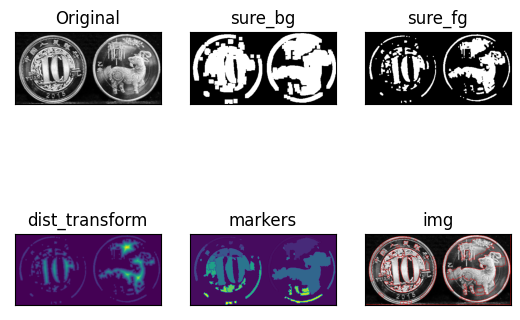

In [40]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# 读入图像
img = cv2.imread('assets/bi.png')
gray = cv2.imread('assets/bi.png', 0)

# 阈值化
ret, thresh = cv2.threshold(
    gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 开运算（先腐蚀后膨胀），去噪声
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# 背景区域
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# 通过距离变换，然后阈值化找前景
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
# 这个地方的阈值（0.5 * dist_transform.max()）调节很重要，直接关系到后面的分割效果
ret, sure_fg = cv2.threshold(
    dist_transform, 0.051 * dist_transform.max(), 255, cv2.THRESH_BINARY)

# 计算未知区域
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# 标记连通区域
ret, markers = cv2.connectedComponents(sure_fg)

# 所有的标记+1，背景改为1，而不是0
markers = markers + 1

# # 标记不确定区域为0
markers[unknown == 255] = 0

# 用分水岭方法找到标记，如果标记为 -1，则该位置设置蓝色，即边缘颜色
markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]

# 显示分割的图像
image2 = np.uint8(img)
cv2.imshow("img2", image2)

# 显示各阶段的图像
plt.subplot(231), plt.imshow(gray, 'gray'), plt.title(
    'Original'), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(sure_bg, 'gray'), plt.title(
    'sure_bg'), plt.xticks([]), plt.yticks([])
plt.subplot(233), plt.imshow(sure_fg, 'gray'), plt.title(
    'sure_fg'), plt.xticks([]), plt.yticks([])
plt.subplot(234), plt.imshow(dist_transform), plt.title(
    'dist_transform'), plt.xticks([]), plt.yticks([])
plt.subplot(235), plt.imshow(markers), plt.title(
    'markers'), plt.xticks([]), plt.yticks([])
plt.subplot(236), plt.imshow(img), plt.title(
    'img'), plt.xticks([]), plt.yticks([])
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()
